# **Effective Model**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC, Change_Basis, Block_Reverse

## **Channel Decomposition** 

We decompose the induced pairing $\Delta_{ind} (z, k)$ over a basis of 16 matrices that generates the whole space made by the outer product of spin $\sigma = \uparrow, \downarrow$ and orbital $\lambda=\pm$.
The $4 \times 4$ matrix can be decomposed as
$$
    {\Delta}_{ind} (z, k) = \sum_a f_a (z, k) B_a \,,
$$
where the coefficients of the expansion can be computed through
$$
    f_a (z, k) = 
    \frac{ \text{Tr}\left( B_a^\dagger \, \Delta_{ind} (z, k)  \right) }
    { \text{Tr}\left( B_a^\dagger \, B_a  \right) }
$$and $\{ B_a \}$ is a basis of 16 matrices that generates the whole space.


For the sake of simplicity, we choose as basis in spin and orbital spaces the set of Pauli matrices 
$$
    S_i = 
    \left\{ 
    \frac12 \left( \sigma_0 + \sigma_z \right), \frac{1}{\sqrt{2}} \sigma_x, \frac{i}{\sqrt{2}} \sigma_y, \frac12 \left( \sigma_0 - \sigma_z \right) 
    \right\} \,,
    \qquad
    T_j = 
    \left\{ 
    \tau_0, \tau_x, \tau_y, \tau_z 
    \right\} \,,   
$$
so that the full set of matrices $\{ B_a \}$ can be simply obtained as the outer product
$$
   B_a = S_i \otimes T_j \,,
$$
with $a = (i,j)$ and $i,j = 0,1,2,3$.

#### <font color='green'> **Pairing Channels** </font> 

In [2]:
from IPython.display import Math, display
from sympy import Matrix, Symbol, latex, simplify, nsimplify, sqrt, kronecker_product, I

from Pairing_Effective_Model import Simpy_Projection, Render_Projection, Render_Channel, Pairing_Projection, Pairing_Channel, Project_All, Reconstruct

# define your physical basis labels (spin x orbital)
basis = [r"\uparrow+", r"\uparrow-", r"\downarrow+", r"\downarrow-"]

# build a 4×4 Matrix of Symbols f_{α,β}
M = Matrix([[ Symbol(f"f_{{{i},{j}}}") for j in basis ] for i in basis ])

# spin and orbital indices
s = 'uu'; o = 'tz'

# projection 
Render_Projection(M=M, spin=s, orbital=o)
print()
# pairing channel
Render_Channel(spin=s, orbital=o)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### <font color='green'> **Singlet-Triplet Decomposition** </font> 

In [3]:
# build a 4×4 Matrix of Symbols f_{α,β}
F = Matrix([[ Symbol(f"f_{{{i},{j}}}") for j in basis ] for i in basis ])

# swap spin only
F_swap = Matrix(Block_Reverse(F))

# matrices for signlet
F_odd = 1/2*(F - F_swap)
# matrices for triplet
F_even = 1/2*(F + F_swap)

# spin singlet S=0 part
Fs_0 = (sqrt(2)*F_odd[0:2, 2:4]).applyfunc(simplify); fs_0 = (Fs_0.norm())**2

# spin triplet S=0 part
Ft_0 = (sqrt(2)*F_even[0:2, 2:4]).applyfunc(simplify); ft_0 = (Ft_0.norm())**2

# spin triplet S=1 part
Ft_p1 = (F_even[0:2, 0:2]).applyfunc(simplify); ft_p1 = (Ft_p1.norm())**2

# spin triplet S=-1 part
Ft_m1 = (F_even[2:4, 2:4]).applyfunc(simplify); ft_m1 = (Ft_m1.norm())**2


print('Singlet S=0')
display(Matrix(Fs_0.applyfunc(nsimplify)))
display(nsimplify(fs_0))
print()

print('Triplet S=0')
display(Matrix(Ft_0.applyfunc(nsimplify)))
display(nsimplify(ft_0))
print()

print('Triplet S=+1')
display(Matrix(Ft_p1.applyfunc(nsimplify)))
display(nsimplify(ft_p1))
print()

print('Triplet S=-1')
display(Matrix(Ft_m1.applyfunc(nsimplify)))
display(nsimplify(ft_m1))

Singlet S=0


⎡√2⋅(-f_{\downarrow+,\uparrow+} + f_{\uparrow+,\downarrow+})  √2⋅(-f_{\downarrow+,\uparrow-} + f_{\uparrow+,\downarrow-})⎤
⎢───────────────────────────────────────────────────────────  ───────────────────────────────────────────────────────────⎥
⎢                             2                                                            2                             ⎥
⎢                                                                                                                        ⎥
⎢√2⋅(-f_{\downarrow-,\uparrow+} + f_{\uparrow-,\downarrow+})  √2⋅(-f_{\downarrow-,\uparrow-} + f_{\uparrow-,\downarrow-})⎥
⎢───────────────────────────────────────────────────────────  ───────────────────────────────────────────────────────────⎥
⎣                             2                                                            2                             ⎦

                                                       2                                                          2                                         
│f_{\downarrow+,\uparrow+} - f_{\uparrow+,\downarrow+}│    │f_{\downarrow+,\uparrow-} - f_{\uparrow+,\downarrow-}│    │f_{\downarrow-,\uparrow+} - f_{\uparr
──────────────────────────────────────────────────────── + ──────────────────────────────────────────────────────── + ──────────────────────────────────────
                           2                                                          2                                                          2          

                 2                                                          2
ow-,\downarrow+}│    │f_{\downarrow-,\uparrow-} - f_{\uparrow-,\downarrow-}│ 
────────────────── + ────────────────────────────────────────────────────────
                                                2                            


Triplet S=0


⎡√2⋅(f_{\downarrow+,\uparrow+} + f_{\uparrow+,\downarrow+})  √2⋅(f_{\downarrow+,\uparrow-} + f_{\uparrow+,\downarrow-})⎤
⎢──────────────────────────────────────────────────────────  ──────────────────────────────────────────────────────────⎥
⎢                            2                                                           2                             ⎥
⎢                                                                                                                      ⎥
⎢√2⋅(f_{\downarrow-,\uparrow+} + f_{\uparrow-,\downarrow+})  √2⋅(f_{\downarrow-,\uparrow-} + f_{\uparrow-,\downarrow-})⎥
⎢──────────────────────────────────────────────────────────  ──────────────────────────────────────────────────────────⎥
⎣                            2                                                           2                             ⎦

                                                       2                                                          2                                         
│f_{\downarrow+,\uparrow+} + f_{\uparrow+,\downarrow+}│    │f_{\downarrow+,\uparrow-} + f_{\uparrow+,\downarrow-}│    │f_{\downarrow-,\uparrow+} + f_{\uparr
──────────────────────────────────────────────────────── + ──────────────────────────────────────────────────────── + ──────────────────────────────────────
                           2                                                          2                                                          2          

                 2                                                          2
ow-,\downarrow+}│    │f_{\downarrow-,\uparrow-} + f_{\uparrow-,\downarrow-}│ 
────────────────── + ────────────────────────────────────────────────────────
                                                2                            


Triplet S=+1


⎡f_{\uparrow+,\uparrow+}  f_{\uparrow+,\uparrow-}⎤
⎢                                                ⎥
⎣f_{\uparrow-,\uparrow+}  f_{\uparrow-,\uparrow-}⎦

                         2                            2                            2                            2
│f_{\uparrow+,\uparrow+}│  + │f_{\uparrow+,\uparrow-}│  + │f_{\uparrow-,\uparrow+}│  + │f_{\uparrow-,\uparrow-}│ 


Triplet S=-1


⎡f_{\downarrow+,\downarrow+}  f_{\downarrow+,\downarrow-}⎤
⎢                                                        ⎥
⎣f_{\downarrow-,\downarrow+}  f_{\downarrow-,\downarrow-}⎦

                             2                                2                                2                                2
│f_{\downarrow+,\downarrow+}│  + │f_{\downarrow+,\downarrow-}│  + │f_{\downarrow-,\downarrow+}│  + │f_{\downarrow-,\downarrow-}│ 

#### <font color='green'> **Singlet-Triplet Projection** </font> 

In [4]:
print('Singlet S=0')
for o in ['t0', 'tx', 'ty', 'tz']:
    Render_Projection(F, spin='asym', orbital=o)
print()

print('Triplet S=0')
for o in ['t0', 'tx', 'ty', 'tz']:
    Render_Projection(F, spin='sym', orbital=o)
print()

print('Triplet S=+1')
for o in ['t0', 'tx', 'ty', 'tz']:
    Render_Projection(F, spin='uu', orbital=o)
print()

print('Triplet S=-1')
for o in ['t0', 'tx', 'ty', 'tz']:
    Render_Projection(F, spin='dd', orbital=o)

Singlet S=0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Triplet S=0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Triplet S=+1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Triplet S=-1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## **Magnetization Dependence**

### Effective Model Coefficients

In [5]:
# shape of the matrix 
n = 4
# space dimensions
K = []; k_dim = 100

# Zeeman values
Zeeman = np.round(np.arange(-0.050, 0.050 + 0.0005, 0.0005), 4)
# store data in matrices
F_model = np.empty((Zeeman.shape[0], k_dim, 4, 4), dtype='complex')


# loop over all files with various Zeeman
for idx, L in enumerate(Zeeman):

    # select file
    filename = "Pairing/Zeeman_kx/pairing_" + str(round(L*1000,3)) + ".txt"
    
    # read file pairing
    rows = np.loadtxt(filename)

    # loop over momenta
    for jdx in range(k_dim):
                
        # read one row
        row = rows[jdx]

        if jdx == 0: K.append(float(row[0]))
    
        # real part
        real = row[1 : 1 + n*n].reshape((n, n))
        # imaginary part
        imag = row[1 + n*n :].reshape((n, n))
        # pairing matrix
        matrix = real + 1j * imag

        F_model[idx][jdx] = Change_Basis(matrix)


# fix the phase of all components
for i in range(F_model.shape[0]):
    for j in range(F_model.shape[1]):

        Fij = F_model[i][j]
        
        # pashe of element 0,0
        phi = np.angle(Fij[0][0])
        # fix the phase of all elements
        F_model[i][j] = Fij * np.exp(-1j * phi)
        
print(F_model.shape)

(201, 100, 4, 4)


#### <font color='black'> **Projection** </font> 

In [6]:
c_proj = np.empty(F_model.shape, dtype='complex')

# loop over Zeeman
for idx in range(F_model.shape[0]):
    # loop over momentum 
    for jdx in range(F_model.shape[1]):

        # get the pairing for given k,z
        F = F_model[idx, jdx]
        # project over matrices
        c_proj[idx,jdx] = Project_All(F, normalize=False)

print(c_proj.shape)

# get the modulus squared
c_weights = np.abs(c_proj)**2
# average over k 
C_weights = np.sum(c_weights, axis=1)

# get the phase of the coefficients
c_phase = np.angle(c_proj)
# average over k 
C_phase = np.average(c_phase, axis=1)

(201, 100, 4, 4)


#### <font color='green'> **Absolute Value** </font> 

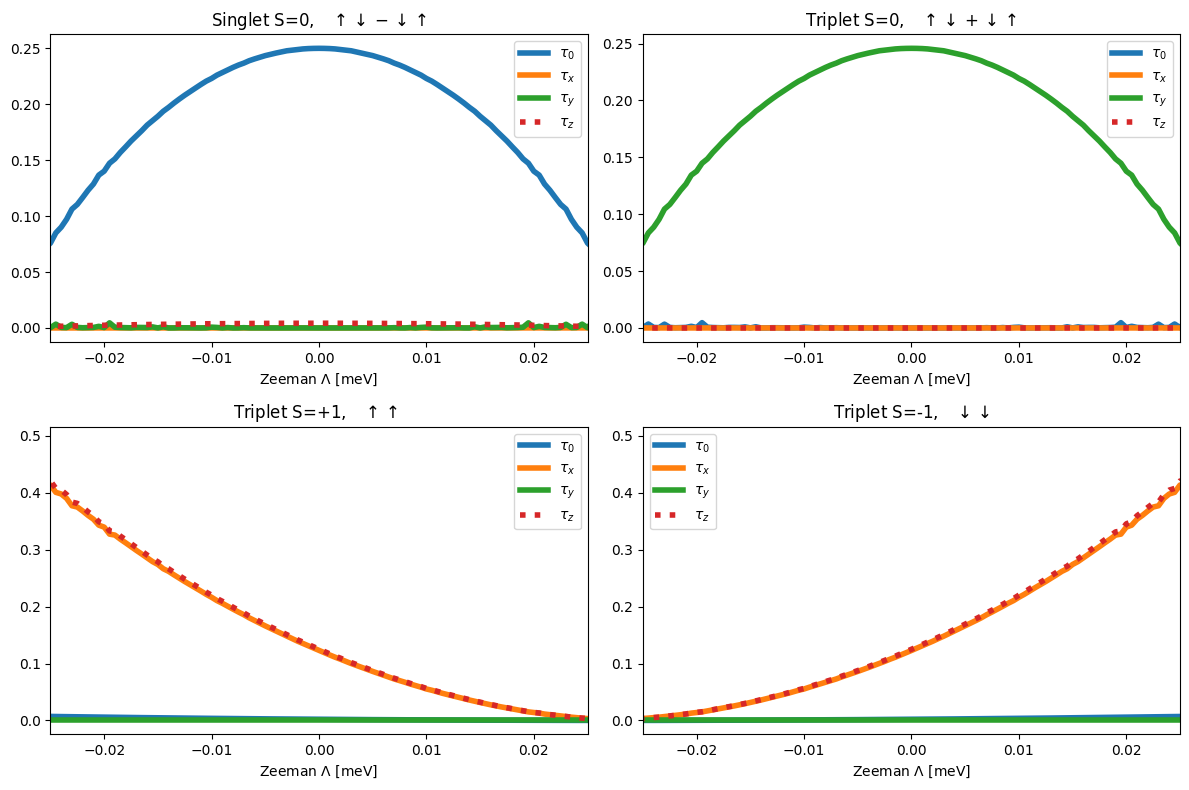

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

title = ['Singlet S=0,   $\\uparrow\\downarrow - \\downarrow\\uparrow$', 'Triplet S=0,   $\\uparrow\\downarrow + \\downarrow\\uparrow$', 'Triplet S=+1,   $\\uparrow\\uparrow$ ', 'Triplet S=-1,   $\\downarrow\\downarrow$']
label = ['$\\tau_0$', '$\\tau_x$', '$\\tau_y$', '$\\tau_z$']

lw = [5,5,4,4]
ls = ['-', '-', '-', ':']

# normalization
norm = np.sum(C_weights, axis=(1,2))

# loop over row (spin states)
for row in range(4):

    # select ax
    ax = axs[row // 2, row % 2]
    
    # loop over column (orbital states)
    for col in range(4):
        # plot the coefficients
        ax.plot(Zeeman, C_weights[:, row, col]/norm, lw=4, label=label[col], ls=ls[col])
    
    ax.set_title(title[row])
    ax.set_xlabel('Zeeman $\Lambda$ [meV]') 

    ax.set_xlim(-0.025, 0.025)
    ax.legend()


plt.tight_layout()
plt.show()

#### <font color='green'> **Phase** </font> 

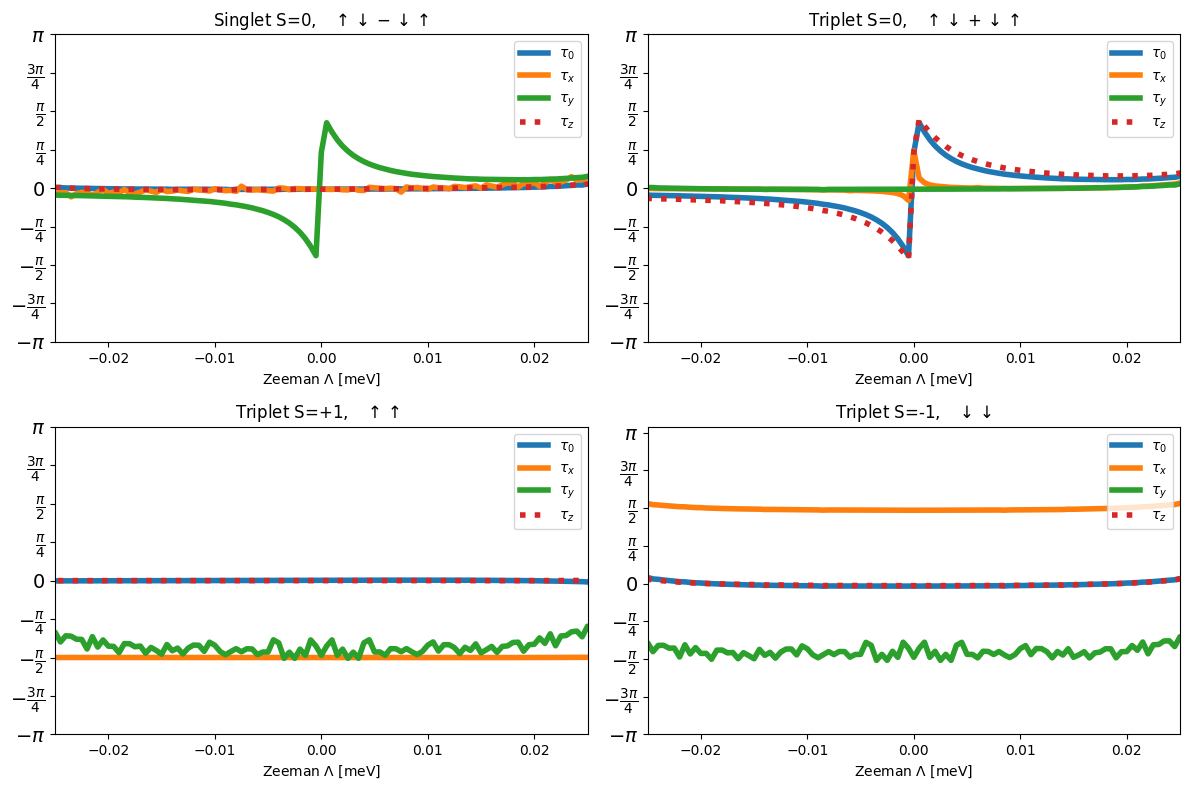

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

title = ['Singlet S=0,   $\\uparrow\\downarrow - \\downarrow\\uparrow$', 'Triplet S=0,   $\\uparrow\\downarrow + \\downarrow\\uparrow$', 'Triplet S=+1,   $\\uparrow\\uparrow$ ', 'Triplet S=-1,   $\\downarrow\\downarrow$']
label = ['$\\tau_0$', '$\\tau_x$', '$\\tau_y$', '$\\tau_z$']

# Tick positions
yticks = [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0,
           np.pi/4,  np.pi/2,  3*np.pi/4,  np.pi]

# Tick labels using LaTeX-style formatting
ytick_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$',
                r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

ls = ['-', '-', '-', ':']

# normalization
norm = np.pi

# loop over row (spin states)
for row in range(4):

    # select ax
    ax = axs[row // 2, row % 2]
    
    # loop over column (orbital states)
    for col in range(4):
        # plot the coefficients
        ax.plot(Zeeman, (C_phase[:, row, col]), lw=4, label=label[col], ls=ls[col])

    
    ax.set_title(title[row])
    ax.set_xlabel('Zeeman $\Lambda$ [meV]') 
    
    ax.set_yticks(yticks, ytick_labels, fontsize=14)

    ax.set_xlim(-0.025, 0.025)
    ax.legend()

    

plt.tight_layout()
plt.show()

#### <font color='green'> **Model Coefficients** </font> 

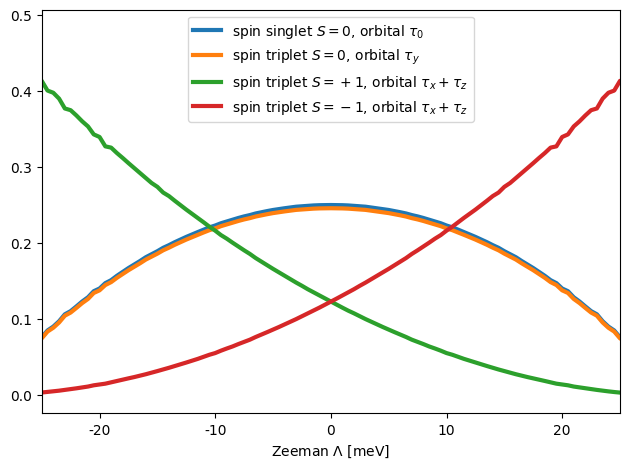

In [9]:
fig, ax = plt.subplots(1)

labels = ['spin singlet $S=0$, orbital $\\tau_0$',
          'spin triplet $S=0$, orbital $\\tau_y$',
          'spin triplet $S=+1$, orbital $\\tau_x+\\tau_z$',
          'spin triplet $S=-1$, orbital $\\tau_x+\\tau_z$' ]

# normalization
norm = np.sum(C_weights, axis=(1,2))

sum = np.zeros(201)
for spin, orbital in zip(range(4), [0, 2, 1, 1]):

    # weights by components
    fc = C_weights[:, spin, orbital]/norm 
    # plot the coefficients
    ax.plot(Zeeman, fc, lw=3, label=labels[spin])

    # sum coefficients
    sum += fc

#ax.plot(Zeeman, sum, c='black', lw=2.5)


ax.set_xlim(-0.025, 0.025)
ax.set_xticks([-0.020, -0.010, 0, 0.010, 0.020])
ax.set_xticklabels(['-20', '-10', '0', '10', '20'])
ax.set_xlabel('Zeeman $\Lambda$ [meV]') 

ax.legend()

plt.tight_layout()
plt.show()

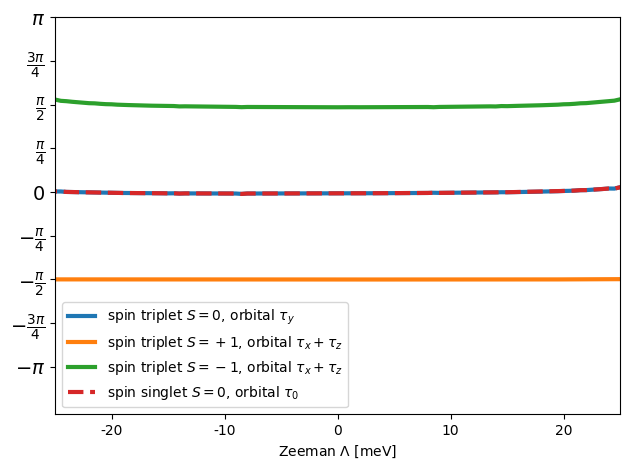

In [10]:
fig, ax = plt.subplots(1)

labels = ['spin singlet $S=0$, orbital $\\tau_0$',
          'spin triplet $S=0$, orbital $\\tau_y$',
          'spin triplet $S=+1$, orbital $\\tau_x+\\tau_z$',
          'spin triplet $S=-1$, orbital $\\tau_x+\\tau_z$']

ls = ['--', '-', '-', '-']

sum = np.zeros(201)
for spin, orbital in zip([1,2,3,0], [2, 1, 1, 0]):

    # phase by components
    fc = C_phase[:, spin, orbital]
    # plot the coefficients
    ax.plot(Zeeman, fc, lw=3, label=labels[spin], ls=ls[spin])

# phase difference between singlet and triplet
#delta_phase = C_phase[:, 0, 0] - C_phase[:, 1, 2]
# plot delta_phase
#ax.plot(Zeeman, delta_phase, lw=2, label='$\Delta \phi$', c='black')

ax.set_xlim(-0.025, 0.025)
ax.set_xticks([-0.020, -0.010, 0, 0.010, 0.020])
ax.set_xticklabels(['-20', '-10', '0', '10', '20'])
ax.set_xlabel('Zeeman $\Lambda$ [meV]') 

ax.set_ylim(-4, np.pi)
ax.set_yticks(yticks, ytick_labels, fontsize=14)

ax.legend()

plt.tight_layout()
plt.show()

#### <font color='green'> **Singlet-Triplet Components** </font> 

In [11]:
# swap spin only
F_swap = np.array([[Block_Reverse(f) for f in F1] for F1 in F_model])

# matrices for signlet
F_odd = 0.5*(F_model - F_swap)
# matrices for triplet
F_even = 0.5*(F_model + F_swap)


# spin singlet S=0 part
Fs_0 = np.sqrt(2)*F_odd[:, :, 0:2, 2:4]; fs_0 = np.linalg.norm(Fs_0, axis=(2, 3))

# spin triplet S=0 part
Ft_0 = np.sqrt(2)*F_even[:, :, 0:2, 2:4]; ft_0 = np.linalg.norm(Ft_0, axis=(2, 3))
# spin triplet S=1 part
Ft_p1 = F_even[:, :, 0:2, 0:2]; ft_p1 = np.linalg.norm(Ft_p1, axis=(2, 3))
# spin triplet S=-1 part
Ft_m1 = F_even[:, :, 2:4, 2:4]; ft_m1 = np.linalg.norm(Ft_m1, axis=(2, 3))

print(fs_0.shape)

(201, 100)


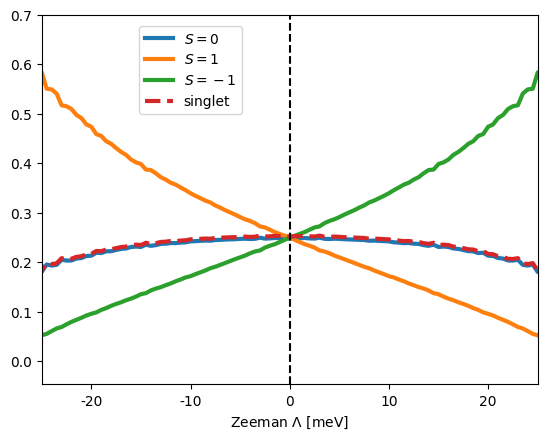

In [13]:
fig, ax = plt.subplots(1)

# normalization
norm = np.sum(ft_0+ft_p1+ft_m1+fs_0, axis=1)

# singlet component
fs_0_sum = np.sum(fs_0, axis=1)/norm
# triplet components
ft_0_sum = np.sum(ft_0, axis=1)/norm
ft_p1_sum = np.sum(ft_p1, axis=1)/norm
ft_m1_sum = np.sum(ft_m1, axis=1)/norm
# total sum
f_all = fs_0_sum + ft_0_sum + ft_p1_sum + ft_m1_sum


# plot triplet components
ax.plot(Zeeman, ft_0_sum, lw=3, label='$S=0$')
ax.plot(Zeeman, ft_p1_sum, lw=3, label='$S=1$')
ax.plot(Zeeman, ft_m1_sum, lw=3, label='$S=-1$')
# plot singlet component
ax.plot(Zeeman, fs_0_sum, lw=3, label='singlet', ls='--')
# plot total sum
ax.plot(Zeeman, f_all, lw=2, c='black')


#ax.plot(Zeeman[50:150], fit(Zeeman[50:150]), lw=5, ls=':', c='black')

# plot vertical line at Lambda=0
ax.axvline(0, lw=1.5, c='black', ls='--')

ax.set_xlim(-0.025, 0.025)
ax.set_ylim(ax.get_ylim()[0], 0.7)
ax.set_xticks([-0.020, -0.010, 0, 0.010, 0.020])
ax.set_xticklabels(['-20', '-10', '0', '10', '20'])
ax.set_xlabel('Zeeman $\Lambda$ [meV]') 

ax.legend(loc='center', bbox_to_anchor=(0.3, 0.85));

#fig.savefig("spin_components.pdf", bbox_inches='tight')